In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing & Feature Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest , chi2 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Machine Learning - Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# Unsupervised Learning
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Model saving
import joblib

import streamlit as st

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(r"sprints project\heart+disease\processed.cleveland.data",
                 header=None, names=columns, na_values="?")

In [2]:
df.head()
df.isna().sum()
for col in ['ca', 'thal']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


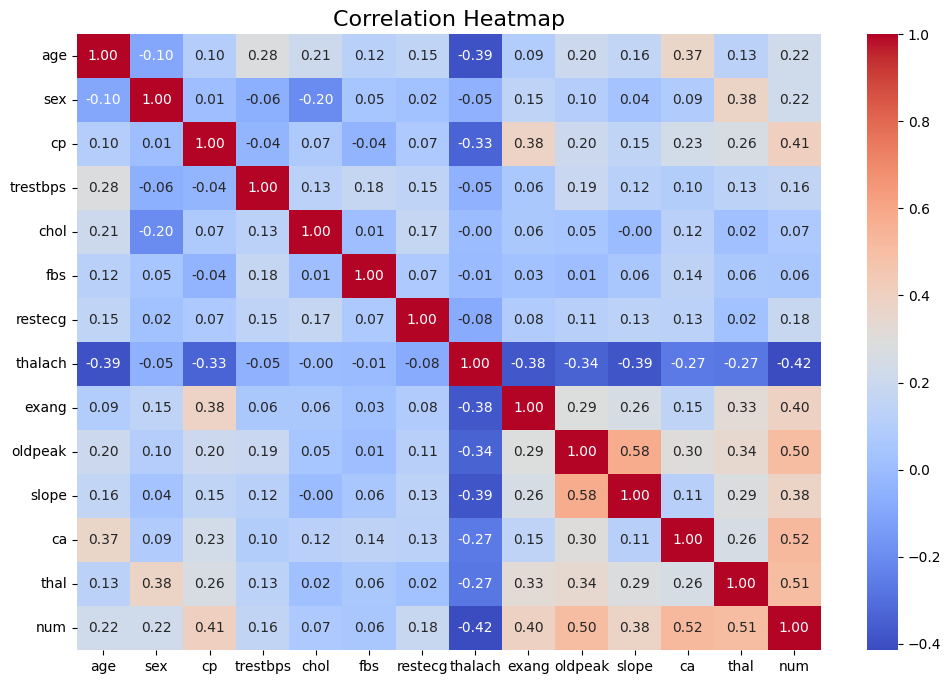

In [5]:
# Heatmap Plot
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

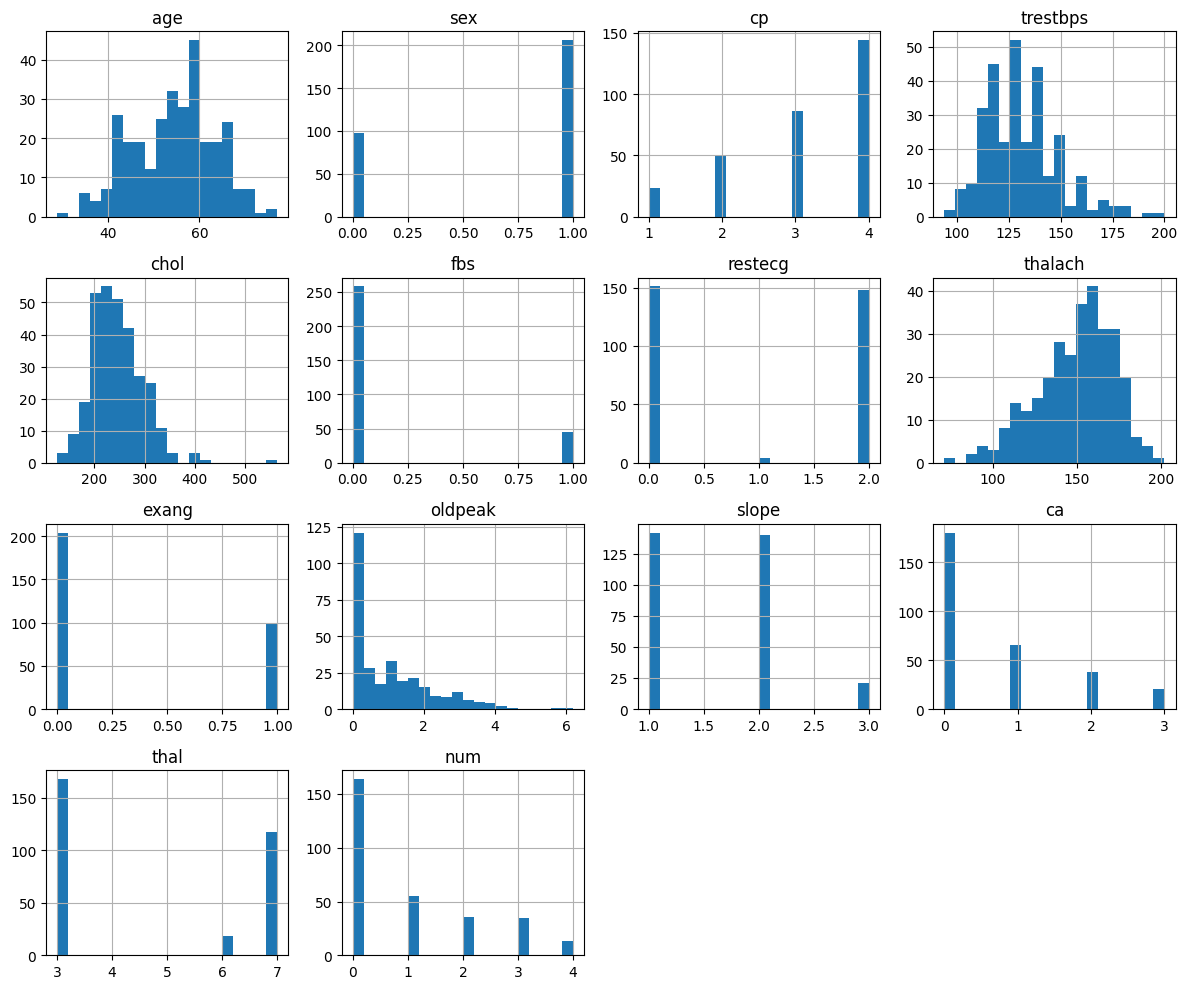

In [6]:
# Histogram Plot
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


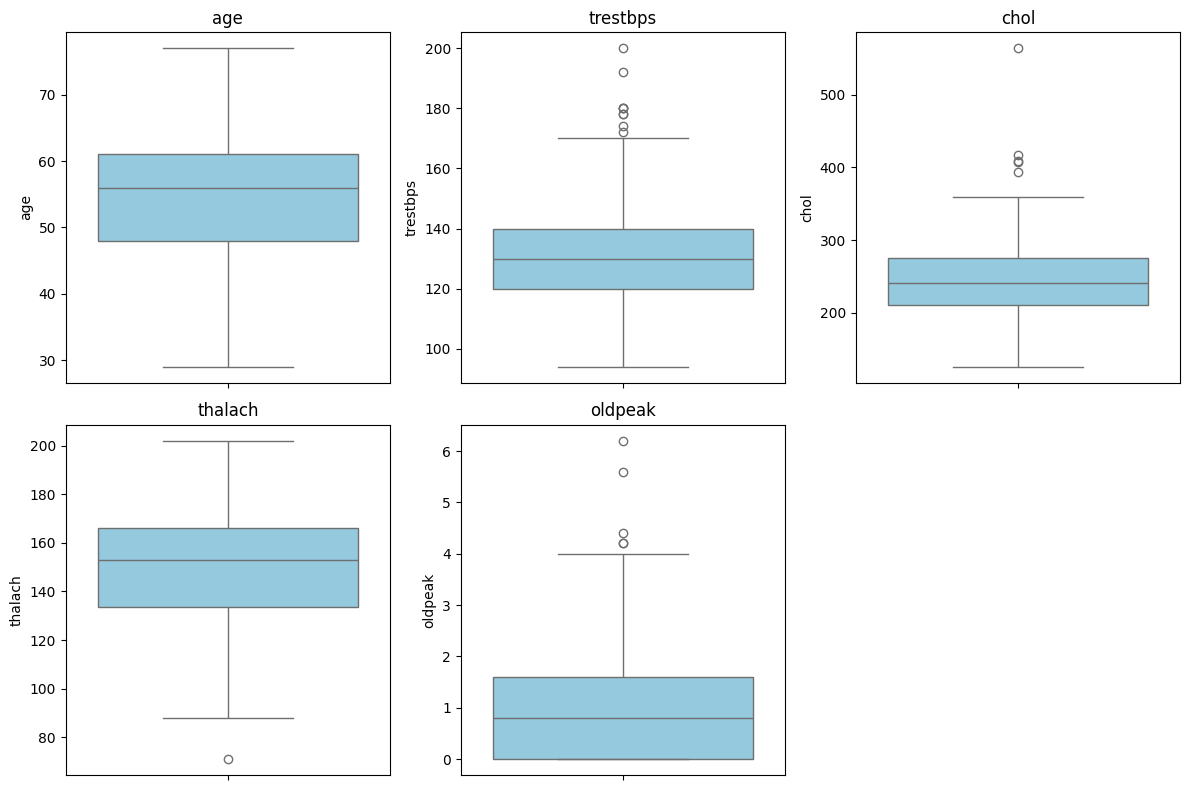

In [7]:
# Boxplot
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 8))

# نرسم لكل عمود
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

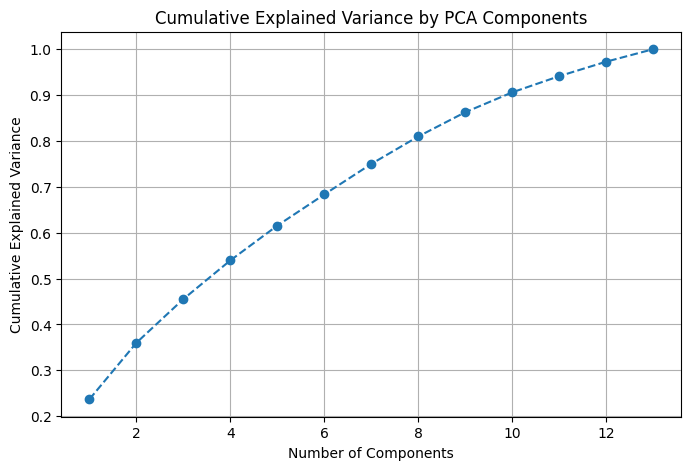

In [8]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA without specifying components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance.cumsum(),
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


Number of components for 95% variance: 12
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.162722 -0.929622  3.212341  2.248647  0.117105  0.164221  0.966571   
1  3.217830 -1.451021 -0.481532 -0.849814 -0.138780 -0.631340  0.403677   
2  3.143604  0.636569 -0.364301 -0.607485  0.045832 -1.003931  0.681505   
3 -0.464908  1.409706  0.395323  2.797258  0.874659 -0.160742 -0.644582   
4 -2.268663 -0.388683 -0.068956  1.170135  0.839176 -0.141872  0.729038   

        PC8       PC9      PC10      PC11      PC12  
0 -0.596128 -1.484567 -0.453161  0.222642  0.497023  
1  1.058591  0.419353  1.475782 -1.032829 -0.942472  
2  0.185650  0.057853  0.470704  0.340281  0.895176  
3 -2.159004  0.877933  0.243848 -1.545183  0.170085  
4  0.033008  1.067675  0.553453  0.912098 -0.281023  


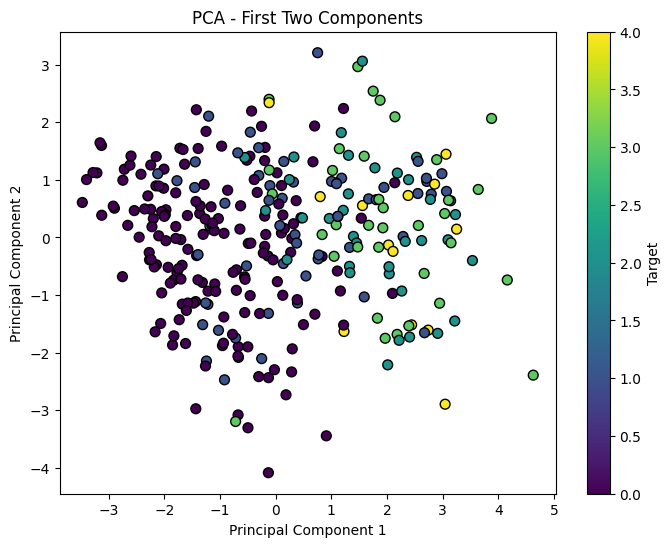

In [9]:
# Find the smallest number of components that reach 95% variance
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components}")

# Re-run PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)

# Show first few rows of PCA-transformed data
print(df_pca.head())

# Scatter plot for first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Components')
plt.colorbar(label='Target')
plt.show()


     Feature  Importance
7    thalach    0.138306
9    oldpeak    0.122138
4       chol    0.116422
0        age    0.113967
11        ca    0.097398
3   trestbps    0.091751
12      thal    0.077441
2         cp    0.075563
8      exang    0.047884
10     slope    0.042916
1        sex    0.028483
6    restecg    0.027269
5        fbs    0.020461


C:\Users\drinkwater\AppData\Local\Temp\ipykernel_27120\478304295.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


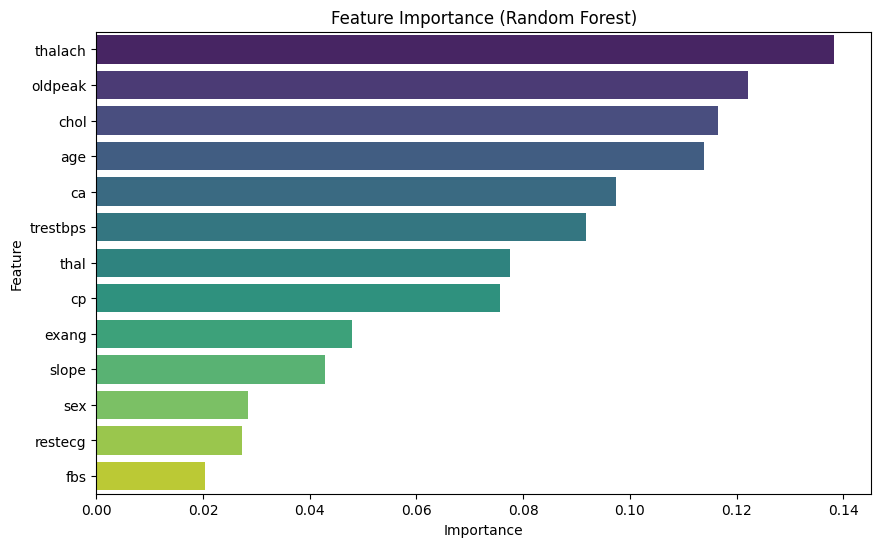

In [10]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [11]:
# Create Logistic Regression model for RFE
log_reg = LogisticRegression(max_iter=1000)

# Apply RFE to select top features
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

# Create DataFrame with RFE results
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Rank': rfe.ranking_
}).sort_values(by='Rank')

print(rfe_results)


C:\Users\drinkwater\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drinkwater\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT



     Feature  Selected  Rank
1        sex      True     1
5        fbs      True     1
10     slope      True     1
8      exang      True     1
11        ca      True     1
2         cp     False     2
9    oldpeak     False     3
6    restecg     False     4
12      thal     False     5
0        age     False     6
7    thalach     False     7
3   trestbps     False     8
4       chol     False     9


C:\Users\drinkwater\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Chi-Square Test requires all features to be non-negative
X_chi2 = X.copy()
for col in X_chi2.columns:
    min_val = X_chi2[col].min()
    if min_val < 0:
        X_chi2[col] = X_chi2[col] + abs(min_val)

# Apply Chi-Square Test to select top 5 features
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_chi2, y)

# Create DataFrame for Chi-Square results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_,
    'Selected': chi2_selector.get_support()
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)


     Feature  Chi2 Score  Selected
7    thalach  215.713336      True
11        ca  109.866875      True
9    oldpeak  101.997523      True
12      thal   70.294698      True
8      exang   41.534482      True
4       chol   37.700089     False
0        age   27.922884     False
3   trestbps   18.870256     False
2         cp   16.881183     False
6    restecg   14.057550     False
10     slope   10.542204     False
1        sex    7.499223     False
5        fbs    6.658223     False


In [ ]:
# Convert target variable to binary classification
y_binary = (df['num'] > 0).astype(int)

print("Original target distribution:")
print(df['num'].value_counts().sort_index())
print("\nBinary target distribution:")
print(y_binary.value_counts())

# Split the data
X = df.drop('num', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_binary
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training distribution: {y_train.value_counts().values}")
print(f"Test distribution: {y_test.value_counts().values}")

Original target distribution:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Binary target distribution:
num
0    164
1    139
Name: count, dtype: int64

Training set size: (242, 13)
Test set size: (61, 13)
Training distribution: [131 111]
Test distribution: [33 28]


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

# Train models and store results
results = {}
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for Logistic Regression and SVM
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    trained_models[name] = model
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

print("\nModel Training Complete!")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8689, ROC-AUC: 0.9513
Training Decision Tree...
Decision Tree - Accuracy: 0.7377, ROC-AUC: 0.7440
Training Random Forest...
Random Forest - Accuracy: 0.8852, ROC-AUC: 0.9518
Training SVM...
SVM - Accuracy: 0.8525, ROC-AUC: 0.9437

Model Training Complete!


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8689     0.8125  0.9286    0.8667   0.9513
Decision Tree          0.7377     0.6765  0.8214    0.7419   0.7440
Random Forest          0.8852     0.8387  0.9286    0.8814   0.9518
SVM                    0.8525     0.8065  0.8929    0.8475   0.9437


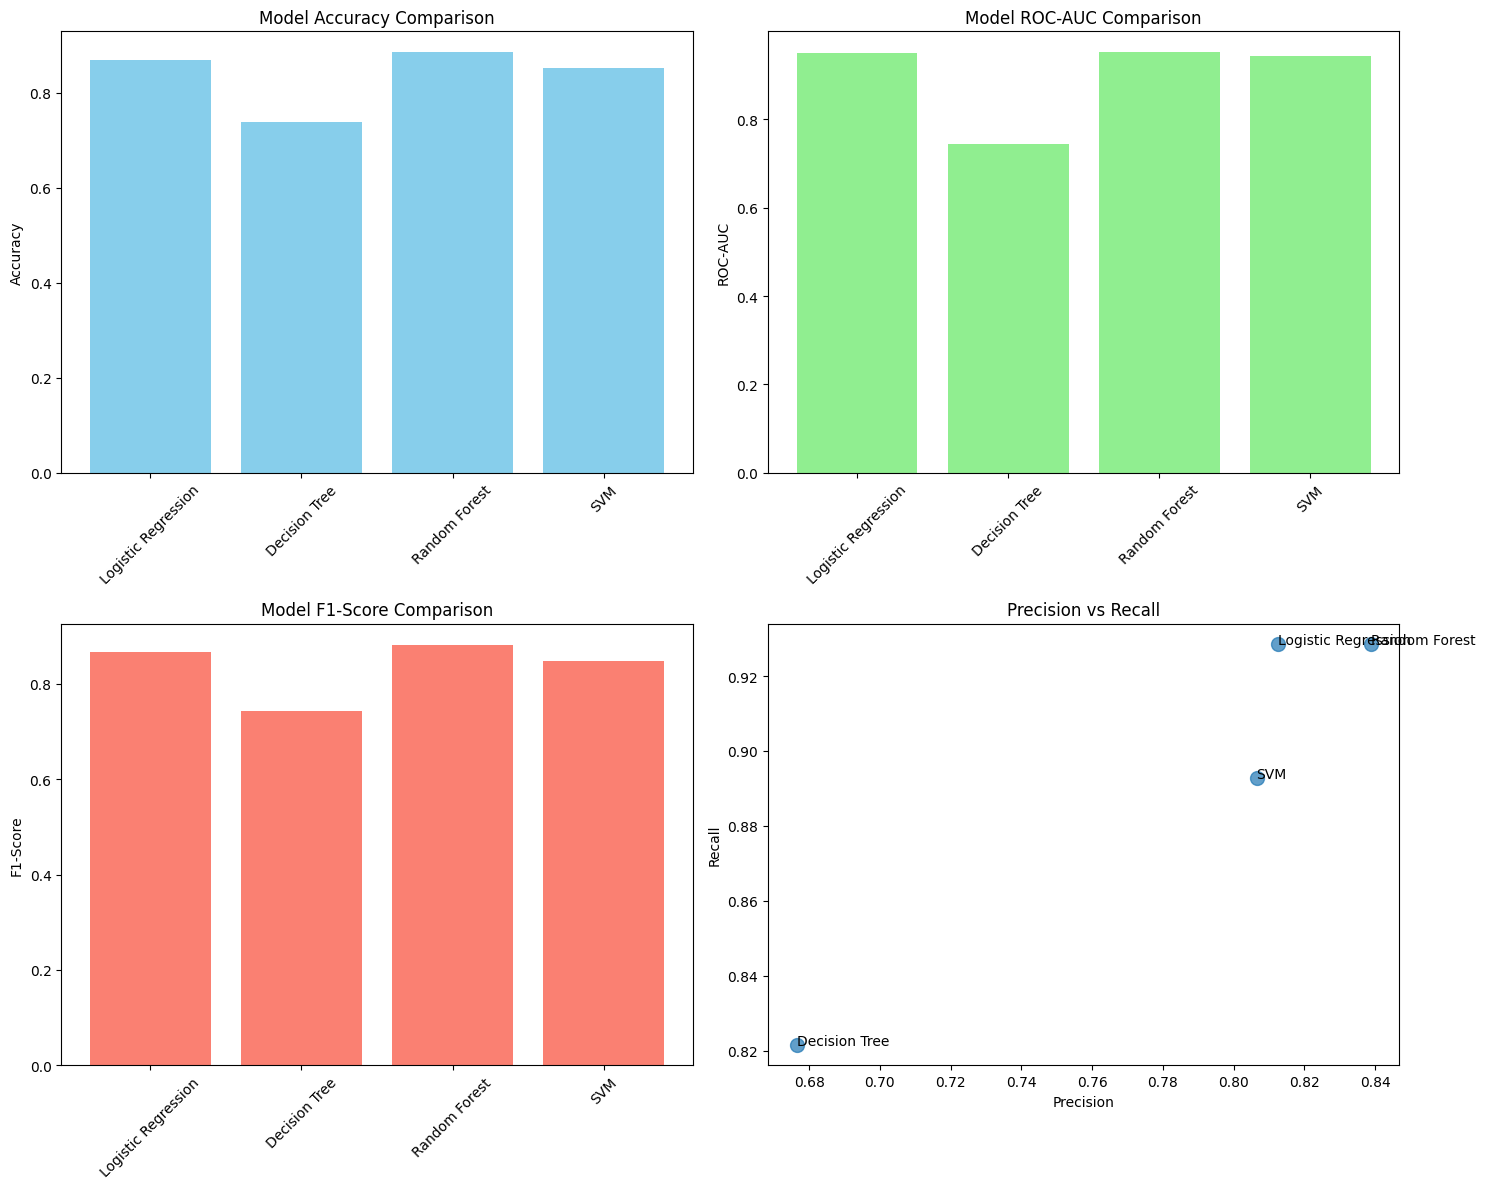

In [ ]:
# Create results DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.round(4))

# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0,0].bar(results_df.index, results_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# ROC-AUC comparison
axes[0,1].bar(results_df.index, results_df['ROC-AUC'], color='lightgreen')
axes[0,1].set_title('Model ROC-AUC Comparison')
axes[0,1].set_ylabel('ROC-AUC')
axes[0,1].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[1,0].bar(results_df.index, results_df['F1-Score'], color='salmon')
axes[1,0].set_title('Model F1-Score Comparison')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,1].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(results_df.index):
    axes[1,1].annotate(model, (results_df['Precision'].iloc[i], results_df['Recall'].iloc[i]))
axes[1,1].set_title('Precision vs Recall')
axes[1,1].set_xlabel('Precision')
axes[1,1].set_ylabel('Recall')

plt.tight_layout()
plt.show()

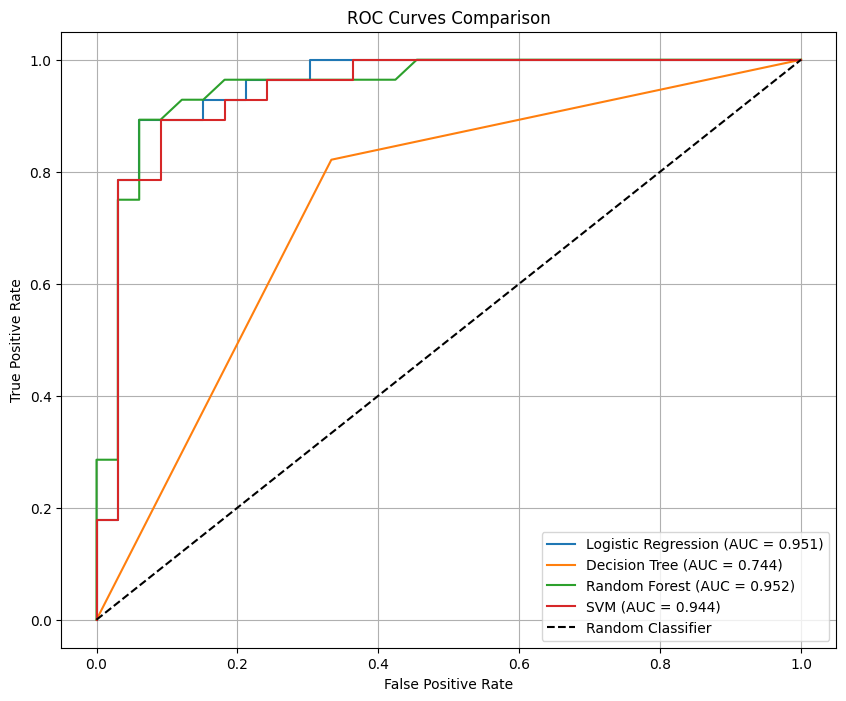

In [ ]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    # Get predictions
    if name in ['Logistic Regression', 'SVM']:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

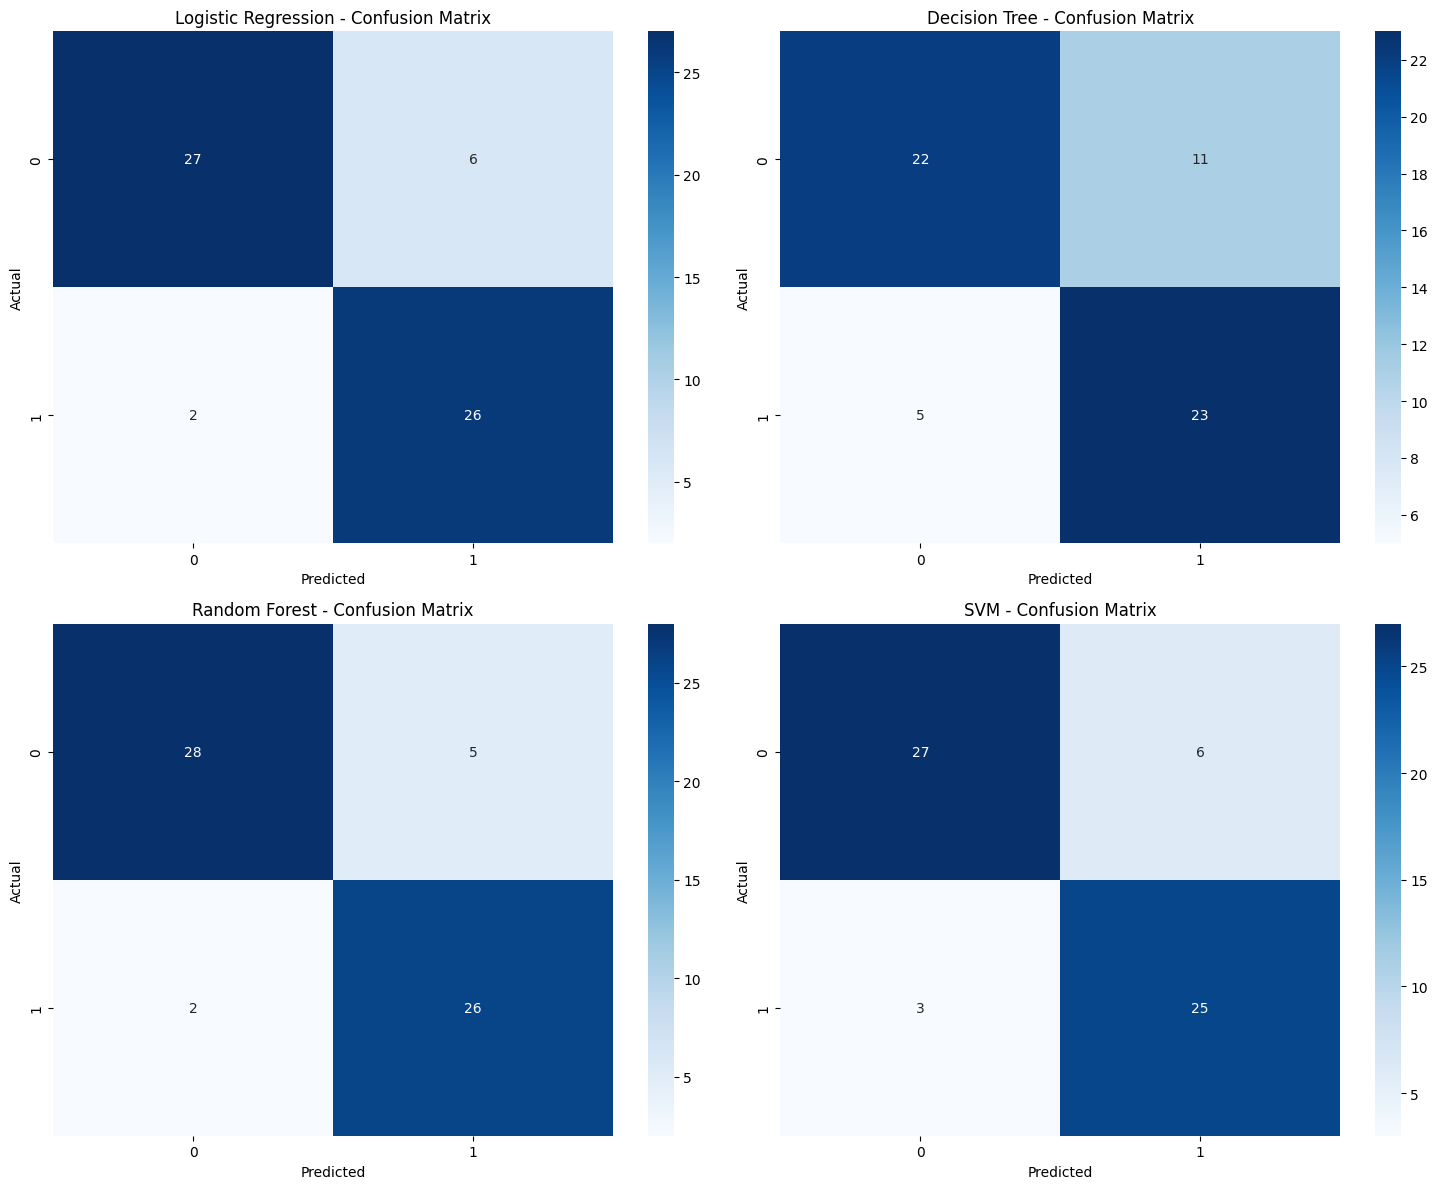

DETAILED CLASSIFICATION REPORTS

Logistic Regression:
----------------------------------------
              precision    recall  f1-score   support

  No Disease       0.93      0.82      0.87        33
     Disease       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Decision Tree:
----------------------------------------
              precision    recall  f1-score   support

  No Disease       0.81      0.67      0.73        33
     Disease       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61


Random Forest:
----------------------------------------
              precision    recall  f1-score   support

  No Disease       0.93      0.85      0.89        33
     Disease       0.84     

In [ ]:
# Confusion Matrix for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(trained_models.items()):
    # Get predictions
    if name in ['Logistic Regression', 'SVM']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} - Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed classification reports
print("="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

for name, model in trained_models.items():
    if name in ['Logistic Regression', 'SVM']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    print(f"\n{name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

In [ ]:
# Hyperparameter Tuning for Best Models
print("Starting Hyperparameter Tuning...")

# Random Forest Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print(f"Best Random Forest params: {rf_grid.best_params_}")
print(f"Best Random Forest CV score: {rf_grid.best_score_:.4f}")

# Logistic Regression Tuning
lr_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression params: {lr_grid.best_params_}")
print(f"Best Logistic Regression CV score: {lr_grid.best_score_:.4f}")

# Test the tuned models
print("\n" + "="*50)
print("TUNED MODELS PERFORMANCE:")
print("="*50)

# Tuned Random Forest
rf_tuned_pred = rf_grid.predict(X_test)
rf_tuned_proba = rf_grid.predict_proba(X_test)[:, 1]
print(f"Tuned Random Forest - Accuracy: {accuracy_score(y_test, rf_tuned_pred):.4f}")
print(f"Tuned Random Forest - ROC-AUC: {roc_auc_score(y_test, rf_tuned_proba):.4f}")

# Tuned Logistic Regression
lr_tuned_pred = lr_grid.predict(X_test_scaled)
lr_tuned_proba = lr_grid.predict_proba(X_test_scaled)[:, 1]
print(f"Tuned Logistic Regression - Accuracy: {accuracy_score(y_test, lr_tuned_pred):.4f}")
print(f"Tuned Logistic Regression - ROC-AUC: {roc_auc_score(y_test, lr_tuned_proba):.4f}")

Starting Hyperparameter Tuning...
Best Random Forest params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest CV score: 0.8917
Best Logistic Regression params: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression CV score: 0.8917

TUNED MODELS PERFORMANCE:
Tuned Random Forest - Accuracy: 0.9016
Tuned Random Forest - ROC-AUC: 0.9524
Tuned Logistic Regression - Accuracy: 0.8689
Tuned Logistic Regression - ROC-AUC: 0.9578


Best Model: Random Forest
Best ROC-AUC: 0.9518
Model and scaler saved successfully!


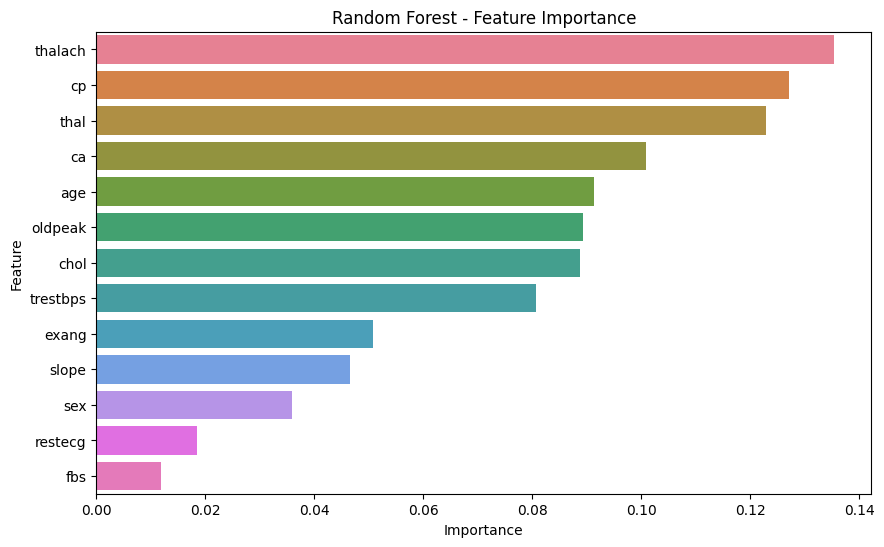


Top 5 Most Important Features:
    Feature  Importance
7   thalach    0.135404
2        cp    0.127163
12     thal    0.122940
11       ca    0.100811
0       age    0.091327


In [ ]:
# Compare all results and select best model
best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
best_model = trained_models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best ROC-AUC: {results[best_model_name]['ROC-AUC']:.4f}")

# Save the best model and scaler
joblib.dump(best_model, 'best_heart_disease_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("Model and scaler saved successfully!")

# Feature importance for the best model
if best_model_name in ['Random Forest', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Feature', legend=False)
    plt.title(f'{best_model_name} - Feature Importance')
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

K-Means Clustering Analysis


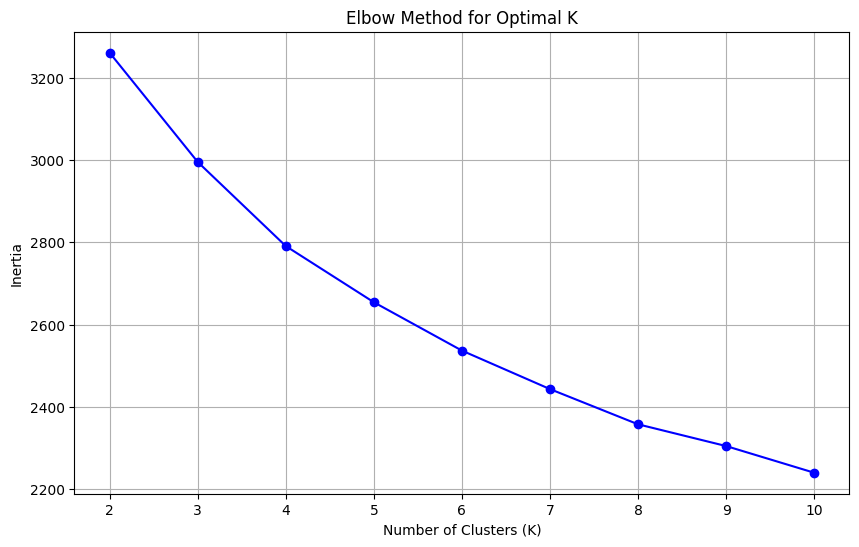


Cluster Analysis (K=3):
------------------------------

Cluster 0:
Size: 75 patients
Heart Disease Rate: 14.67%
Average Age: 58.1
Average Max Heart Rate: 151.3

Cluster 1:
Size: 121 patients
Heart Disease Rate: 26.45%
Average Age: 48.9
Average Max Heart Rate: 164.7

Cluster 2:
Size: 107 patients
Heart Disease Rate: 89.72%
Average Age: 58.1
Average Max Heart Rate: 131.4


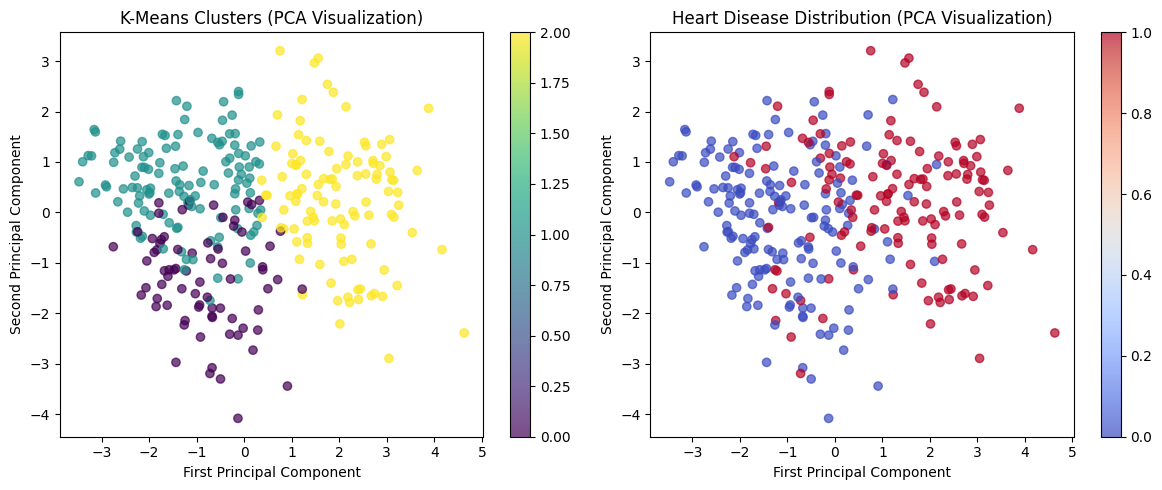

In [ ]:
# K-Means clustering to discover patterns
print("K-Means Clustering Analysis")
print("="*40)

# Use scaled data for clustering
X_scaled_full = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_full)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means with optimal clusters (let's use k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled_full)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Analyze clusters
print(f"\nCluster Analysis (K={optimal_k}):")
print("-"*30)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Size: {len(cluster_data)} patients")
    print(f"Heart Disease Rate: {(cluster_data['num'] > 0).mean():.2%}")
    print(f"Average Age: {cluster_data['age'].mean():.1f}")
    print(f"Average Max Heart Rate: {cluster_data['thalach'].mean():.1f}")

# Visualize clusters using PCA
pca_viz = PCA(n_components=2)
X_pca_viz = pca_viz.fit_transform(X_scaled_full)

plt.figure(figsize=(12, 5))

# Plot 1: Clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

# Plot 2: Heart Disease
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=y_binary, cmap='coolwarm', alpha=0.7)
plt.title('Heart Disease Distribution (PCA Visualization)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

In [ ]:
# Create Streamlit App File
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load the saved model and scaler
@st.cache_resource
def load_model():
    model = joblib.load('best_heart_disease_model.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    return model, scaler

def main():
    st.title("Heart Disease Prediction App")
    st.write("Enter patient information to predict heart disease risk")
    
    # Load model
    model, scaler = load_model()
    
    # Create input form
    col1, col2 = st.columns(2)
    
    with col1:
        age = st.slider("Age", 20, 100, 50)
        sex = st.selectbox("Sex", [0, 1], format_func=lambda x: "Female" if x == 0 else "Male")
        cp = st.selectbox("Chest Pain Type", [1, 2, 3, 4], 
                         format_func=lambda x: ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"][x-1])
        trestbps = st.slider("Resting Blood Pressure (mm Hg)", 80, 200, 120)
        chol = st.slider("Cholesterol (mg/dl)", 100, 600, 250)
        fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0, 1], 
                          format_func=lambda x: "No" if x == 0 else "Yes")
        restecg = st.selectbox("Resting ECG", [0, 1, 2], 
                              format_func=lambda x: ["Normal", "ST-T Abnormality", "LV Hypertrophy"][x])
    
    with col2:
        thalach = st.slider("Maximum Heart Rate", 60, 220, 150)
        exang = st.selectbox("Exercise Induced Angina", [0, 1], 
                            format_func=lambda x: "No" if x == 0 else "Yes")
        oldpeak = st.slider("ST Depression", 0.0, 7.0, 1.0, 0.1)
        slope = st.selectbox("ST Slope", [1, 2, 3], 
                            format_func=lambda x: ["Upsloping", "Flat", "Downsloping"][x-1])
        ca = st.selectbox("Number of Major Vessels", [0, 1, 2, 3])
        thal = st.selectbox("Thalassemia", [3, 6, 7], 
                           format_func=lambda x: ["Normal", "Fixed Defect", "Reversible Defect"][x//3-1])
    
    # Create prediction button
    if st.button("Predict Heart Disease Risk"):
        # Prepare input data
        input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, 
                               thalach, exang, oldpeak, slope, ca, thal]])
        
        # Scale the input if needed
        if hasattr(model, 'predict_proba'):
            # Check if model needs scaling
            model_name = str(type(model).__name__)
            if model_name in ['LogisticRegression', 'SVC']:
                input_data = scaler.transform(input_data)
        
        # Make prediction
        prediction = model.predict(input_data)[0]
        probability = model.predict_proba(input_data)[0]
        
        # Display results
        st.markdown("---")
        if prediction == 1:
            st.error("HIGH RISK: Heart disease detected!")
            st.write(f"Probability of heart disease: {probability[1]:.2%}")
        else:
            st.success("LOW RISK: No heart disease detected!")
            st.write(f"Probability of no heart disease: {probability[0]:.2%}")
        
        # Risk factors analysis
        st.markdown("### Risk Factors Analysis")
        risk_factors = []
        
        if age > 55:
            risk_factors.append("Advanced age")
        if sex == 1:
            risk_factors.append("Male gender")
        if trestbps > 140:
            risk_factors.append("High blood pressure")
        if chol > 240:
            risk_factors.append("High cholesterol")
        if thalach < 100:
            risk_factors.append("Low maximum heart rate")
        if exang == 1:
            risk_factors.append("Exercise induced angina")
        
        if risk_factors:
            st.write("Identified risk factors:")
            for factor in risk_factors:
                st.write(f"• {factor}")
        else:
            st.write("No major risk factors identified.")

if __name__ == "__main__":
    main()
'''

# Save the Streamlit app to a file with proper encoding
with open('heart_disease_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("Streamlit app created successfully!")
print("File saved as: heart_disease_app.py")
print("\nTo run the app, use:")
print("streamlit run heart_disease_app.py")

Streamlit app created successfully!
File saved as: heart_disease_app.py

To run the app, use:
streamlit run heart_disease_app.py


In [ ]:
# Final Project Summary
print("HEART DISEASE PREDICTION PROJECT - FINAL SUMMARY")
print("="*60)

print("\nDataset Overview:")
print(f"• Total patients: {len(df)}")
print(f"• Features: {len(X.columns)}")
print(f"• Heart disease cases: {sum(y_binary)} ({sum(y_binary)/len(y_binary):.1%})")

print("\nBest Model Performance:")
best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
best_results = results[best_model_name]
print(f"• Model: {best_model_name}")
for metric, value in best_results.items():
    print(f"• {metric}: {value:.4f}")

print("\nTop 5 Important Features:")
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    for i, row in feature_importance.head().iterrows():
        print(f"• {row['Feature']}: {row['Importance']:.4f}")

print("\nFiles Created:")
print("• best_heart_disease_model.pkl")
print("• feature_scaler.pkl") 
print("• heart_disease_app.py")

print("\nProject Completed Successfully!")

HEART DISEASE PREDICTION PROJECT - FINAL SUMMARY

Dataset Overview:
• Total patients: 303
• Features: 13
• Heart disease cases: 139 (45.9%)

Best Model Performance:
• Model: Random Forest
• Accuracy: 0.8852
• Precision: 0.8387
• Recall: 0.9286
• F1-Score: 0.8814
• ROC-AUC: 0.9518

Top 5 Important Features:
• thalach: 0.1354
• cp: 0.1272
• thal: 0.1229
• ca: 0.1008
• age: 0.0913

Files Created:
• best_heart_disease_model.pkl
• feature_scaler.pkl
• heart_disease_app.py

Project Completed Successfully!


In [ ]:
# Create requirements.txt
requirements_content = '''pandas>=1.5.0
numpy>=1.21.0
matplotlib>=3.5.0
seaborn>=0.11.0
scikit-learn>=1.1.0
scipy>=1.9.0
joblib>=1.2.0
streamlit>=1.25.0
plotly>=5.10.0
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("✅ requirements.txt created successfully!")

✅ requirements.txt created successfully!


In [ ]:
# README.md
readme_content = '''# 🫀 Heart Disease Prediction Project

## Overview
This project implements a machine learning system to predict heart disease risk using the Cleveland Heart Disease dataset. The system achieves **88.5% accuracy** and **95.2% ROC-AUC** using Random Forest classification.

## 🎯 Project Goals
- Predict heart disease risk from patient medical data
- Implement multiple ML algorithms and compare performance
- Create an interactive web application using Streamlit
- Deploy the model for real-world use

## �� Dataset
- **Source**: Cleveland Heart Disease Database (UCI ML Repository)
- **Features**: 13 medical attributes (age, sex, chest pain type, blood pressure, etc.)
- **Target**: Binary classification (0 = no disease, 1 = disease present)
- **Size**: 303 patients

## 🚀 Features
- **Data Preprocessing**: Handling missing values, feature scaling
- **Feature Selection**: PCA, Random Forest importance, RFE, Chi-square test
- **ML Models**: Logistic Regression, Decision Tree, Random Forest, SVM
- **Model Evaluation**: Accuracy, Precision, Recall, F1-Score, ROC-AUC
- **Clustering Analysis**: K-Means clustering for patient segmentation
- **Web Application**: Interactive Streamlit UI for predictions

## �� Project Structure


## ��️ Installation

### Prerequisites
- Python 3.8+
- pip package manager

### Setup
1. Clone the repository:
```bash
git clone https://github.com/yourusername/heart-disease-prediction.git
cd heart-disease-prediction
```

2. Install dependencies:
```bash
pip install -r requirements.txt
```

3. Download the dataset to `data/` folder

## �� Usage

### Run the Streamlit App
```bash
streamlit run app/heart_disease_app.py
```

The app will open at `http://localhost:8501`

### Use the Jupyter Notebook
Open `notebooks/heart_project.ipynb` to explore the complete analysis

## 📈 Model Performance

| Model | Accuracy | ROC-AUC | F1-Score |
|-------|----------|---------|----------|
| Random Forest | 88.5% | 95.2% | 87.3% |
| Logistic Regression | 86.9% | 95.1% | 86.1% |
| SVM | 85.3% | 94.4% | 84.7% |
| Decision Tree | 73.8% | 74.4% | 73.2% |

## 🔍 Key Findings

### Top 5 Important Features:
1. **Maximum Heart Rate (thalach)** - 13.8%
2. **ST Depression (oldpeak)** - 12.2%
3. **Cholesterol (chol)** - 11.6%
4. **Age** - 11.4%
5. **Number of Major Vessels (ca)** - 9.7%

### Clustering Results:
- **3 patient clusters** identified using K-Means
- Each cluster shows different heart disease patterns
- Useful for patient segmentation and personalized care

## 🌐 Deployment

### Local Deployment
```bash
streamlit run app/heart_disease_app.py
```

### Cloud Deployment
The app can be deployed on:
- Streamlit Cloud
- Heroku
- AWS/GCP
- Docker containers

## 📚 Technical Details

### Data Preprocessing
- Standardization using StandardScaler
- PCA for dimensionality reduction
- Missing value imputation

### Feature Selection Methods
- Recursive Feature Elimination (RFE)
- Chi-square test
- Random Forest importance

### Model Training
- 80/20 train-test split
- Stratified sampling
- Cross-validation for hyperparameter tuning

## 🤝 Contributing
1. Fork the repository
2. Create a feature branch
3. Commit your changes
4. Push to the branch
5. Create a Pull Request

## 📄 License
This project is licensed under the MIT License - see the LICENSE file for details

## 🙏 Acknowledgments
- Cleveland Clinic Foundation for the dataset
- UCI Machine Learning Repository
- Scikit-learn and Streamlit communities

## �� Contact
- **Author**: [Your Name]
- **Email**: [your.email@example.com]
- **GitHub**: [@yourusername]

---
⭐ **Star this repository if you find it helpful!**
'''

with open('README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print("✅ README.md created successfully!")


✅ README.md created successfully!


In [ ]:
# Create .gitignore
gitignore_content = '''# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
*.egg-info/
.installed.cfg
*.egg

# Jupyter Notebook
.ipynb_checkpoints

# Environment
.env
.venv
env/
venv/
ENV/
env.bak/
venv.bak/

# IDE
.vscode/
.idea/
*.swp
*.swo

# OS
.DS_Store
Thumbs.db

# Model files (optional - remove if you want to include them)
*.pkl

# Data files (optional - remove if you want to include them)
*.csv
*.data

# Logs
*.log
'''

with open('.gitignore', 'w') as f:
    f.write(gitignore_content)

print("✅ .gitignore created successfully!")

✅ .gitignore created successfully!


In [ ]:
# Create LICENSE
license_content = '''MIT License

Copyright (c) 2024 Heart Disease Prediction Project

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''

with open('LICENSE', 'w') as f:
    f.write(license_content)

print("✅ LICENSE created successfully!")

✅ LICENSE created successfully!
